In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/romi_sai/Desktop/College/Senior/Summer2021/CSE474/Assignments/Assignment1/insurance.csv"

In [3]:
#opening csv & reading in rows 
#some parts of this code was found on Python Docs (https://docs.python.org/3/library/csv.html)
with open(filename, newline='') as csvfile:
    lines = csv.reader(csvfile)
    rows=[]
    for row in lines:
        rows.append(row)

In [4]:
#converting the smokers to binary to be able to take the inverse/transpose
for elem in rows:
    if(elem[4] == 'yes'):
        elem[4] = 1
    if(elem[4] == 'no'):
        elem[4] = 0

In [5]:
##Age, BMI and Smoker are the only features we are using!
age=[]
bmi=[]
smoker=[]
charges=[]
test_age=[]
test_bmi=[]
test_smoker=[]
test_charges=[]
train_age=[]
train_bmi=[]
train_smoker=[]
train_charges=[]
train_bias=[]
test_bias=[]

#Converting the age, bmi, smoker and charges to lists for easy access
for thing in rows:
    age.append(thing[0])
    bmi.append(thing[2])
    smoker.append(thing[4])
    charges.append(thing[6])
    
#removing the labels (0 row) from all the lists so we are working with numbers only.    
age.remove('age')
bmi.remove('bmi')
smoker.remove('smoker')
charges.remove('charges')

#print(len(age))

#defining the train and test datasets for the features: age, bmi and smoker for X and charges for Y
for i in range(0, 1070, 1):
    train_bias.append(1)
    train_age.append(age[i])
    train_bmi.append(bmi[i])
    train_smoker.append(smoker[i])
    train_charges.append(charges[i])
    
for j in range(1070, 1338, 1):
    #print(j)
    test_bias.append(1)
    test_age.append(age[j])
    test_bmi.append(bmi[j])
    test_smoker.append(smoker[j])
    test_charges.append(charges[j]) 

In [6]:
###Converting the lists from strings to integers and floats
##This function was found on the numpy docs (https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
Xtrain = np.matrix((train_bias, train_age, train_bmi,train_smoker), dtype=float)
Xtrain = Xtrain.transpose()

Xtest = np.matrix((test_bias, test_age, test_bmi, test_smoker), dtype=float)
Xtest = Xtest.transpose()

Ytrain = np.matrix((train_charges), dtype=float)
Ytrain = Ytrain.transpose()

Ytest = np.matrix((test_charges), dtype=float)
Ytest = Ytest.transpose()

#Xtrain.shape

# OLS ESTIMATE

### Step 1: Find w using only TRAINING DATA (w=Xt y [Xt X]^-1)

In [7]:
##Is the transposing of w okay? How could I know?
## Is matmul or dot the right way to multiply two matrices? 
##Shouldn't it be 1070 x 1070? 

def find_w(x_train, y_train):
    Xtrain_t = x_train.transpose()
    Xtrain_inv = np.dot(Xtrain_t, x_train)
    Xtrain_inv = np.linalg.inv(Xtrain_inv)
    first_term = np.dot(Xtrain_inv, Xtrain_t)
    
    w = np.dot(first_term, y_train)
    wt = w.transpose()
    return wt

In [8]:
step1_weight = find_w(Xtrain, Ytrain)
print("The weight vector is: \n" + str(step1_weight))

The weight vector is: 
[[-11853.16958248    261.77032429    323.81304386  23619.60977643]]


### Step 2: Find y hat using only TESTING DATA [ŷi = wt * X]

In [9]:
y_pred = np.dot(Xtest, step1_weight.transpose())

print("The Predicted values of Y for each X value from the test dataset is: \n" + str(y_pred))

The Predicted values of Y for each X value from the test dataset is: 
[[33455.69172876]
 [14820.66201229]
 [ 3764.78391357]
 [11634.14863613]
 [ 9790.16203439]
 [ 6105.10876279]
 [10812.05306291]
 [ 2072.8607594 ]
 [29354.4065037 ]
 [15537.90790444]
 [  -88.65564989]
 [ 5536.81687081]
 [ 4554.17296574]
 [ 6723.59167656]
 [14251.26929632]
 [27901.26154409]
 [11926.68119959]
 [13280.80230568]
 [17217.72199475]
 [ 9962.23684735]
 [35788.43949311]
 [12203.54135209]
 [ 4756.23441054]
 [27369.30386179]
 [12147.84621036]
 [ 3010.23517985]
 [36437.23074634]
 [ 4840.94404317]
 [11756.61501004]
 [ 5697.49388571]
 [26588.07096819]
 [11281.71065955]
 [ 8347.44974999]
 [15012.6838491 ]
 [ 7481.96112347]
 [12398.34741964]
 [10663.68164549]
 [ 9725.72464228]
 [ 4667.250165  ]
 [ 6516.09045335]
 [12741.58924613]
 [34144.89527095]
 [32701.98294389]
 [ 3997.53974696]
 [ 2104.20558132]
 [13123.17039666]
 [ 8477.23233363]
 [29103.38705319]
 [31981.17721369]
 [ 2460.01037138]
 [27954.88722995]
 [12548.2092

### Step 3: Find the RMSE using TESTING DATA  

    sqrt((sum(i,N)(yi - predicted_y)^2)/N)

In [10]:
def find_rmse(y_actual, y_prediction):
    difference_squared=[]
    
    for i in range(0,268,1):
        difference = np.subtract(y_actual[i], y_prediction[i])
        squared = np.square(difference)
        difference_squared.append(squared)

    summation = np.sum(difference_squared)
    
    final = summation/268 #only the testing data
    
    sqrt = np.sqrt(final)
    
    return sqrt
   

In [11]:
rmse = find_rmse(Ytest, y_pred)
#6000 - 7000
print(rmse)

6123.81761554638


### Step 4: Plot comparing the actual & predictions

   Compare yPred and Ytest 

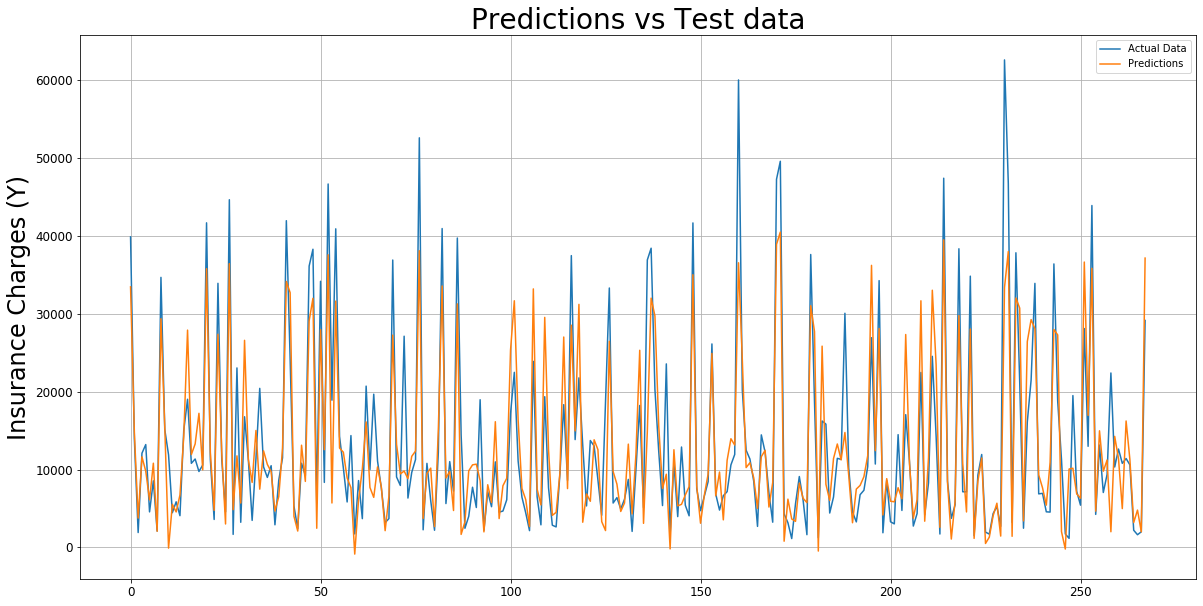

In [12]:
##Plotting the predictions vs the actual data.
plt.figure(figsize=(20,10))
plt.plot(Ytest, label='Actual Data')
plt.plot(y_pred, label='Predictions')
plt.grid()
plt.ylabel('Insurance Charges (Y)', fontsize=24)
plt.title('Predictions vs Test data', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

# GRADIENT DESCENT METHOD

### Step 1: Finding w using Gradient Descent Method using only the TRAINING DATA

In [13]:
### Step 1: Initializing random w, to find w

##RERUN THIS UNTIL GRADIENT IS CLOSE TO 0
fake_w = np.matrix([10,20,30,40], dtype=float).transpose()

#Step1: Find Gradient J(w) = -2XtY + 2XtXw
for i in range(0, 2000000 , 1):
    #Calculating -2XtY
    firstTerm = np.dot(Xtrain.transpose(), Ytrain )
    firstTerm = firstTerm * -2

    #Calculating 2XtXw
    secondTerm = np.dot(Xtrain.transpose(), Xtrain ) 
    secondTerm = np.dot(secondTerm, fake_w)
    secondTerm = secondTerm * 2

    #calculating the gradient
    gradient = firstTerm + secondTerm
    
    
    ##Using the gradient descent method to calculate the real w
    alpha = 0.0000001
    g_alpha = gradient * alpha
    fake_w = fake_w - g_alpha 
    
    
    if(gradient.all() <= 0.00001):
        break  


print("The w calculated using the Stochastic Gradient Descent method is: \n"+ str(fake_w))

# w from OLS Estimate: [[-11853.16958248    261.77032429    323.81304386  23619.60977643]]

The w calculated using the Stochastic Gradient Descent method is: 
[[-11853.14956291]
 [   261.77022488]
 [   323.81254869]
 [ 23619.60868888]]


### Step 2: Find y hat using only TESTING DATA [ŷi = wt * X]

In [14]:
yhat = np.dot(Xtest, fake_w)

print("The Predicted values of Y for each X value from the test dataset is: \n" + str(yhat))

The Predicted values of Y for each X value from the test dataset is: 
[[33455.68862663]
 [14820.66019826]
 [ 3764.78636901]
 [11634.14898693]
 [ 9790.16701024]
 [ 6105.11094912]
 [10812.05256469]
 [ 2072.86580209]
 [29354.40696525]
 [15537.90499362]
 [  -88.64820451]
 [ 5536.81992617]
 [ 4554.179329  ]
 [ 6723.59291713]
 [14251.26805212]
 [27901.26753741]
 [11926.68140394]
 [13280.8010411 ]
 [17217.71320553]
 [ 9962.24035655]
 [35788.43583259]
 [12203.54113307]
 [ 4756.23595163]
 [27369.30555363]
 [12147.84457211]
 [ 3010.23788649]
 [36437.22729722]
 [ 4840.94515386]
 [11756.61457181]
 [ 5697.49458921]
 [26588.07716434]
 [11281.71124842]
 [ 8347.44760477]
 [15012.68023705]
 [ 7481.96270875]
 [12398.34660185]
 [10663.68197591]
 [ 9725.72670788]
 [ 4667.2527448 ]
 [ 6516.09592265]
 [12741.58790346]
 [34144.89141579]
 [32701.98430398]
 [ 3997.54395263]
 [ 2104.21117783]
 [13123.16877136]
 [ 8477.23360049]
 [29103.38699595]
 [31981.17516283]
 [ 2460.01752995]
 [27954.88832721]
 [12548.2057

### Step 3: Find the RMSE using TESTING DATA 

sqrt((sum(i,N)(yi - predicted_y)^2)/N)

In [15]:
gd_rmse = find_rmse(Ytest, yhat)
#6000 - 7000
print(gd_rmse)

6123.817525900091


### Step 4: Plot comparing the actual & predictions

   Compare yhat and Ytest 

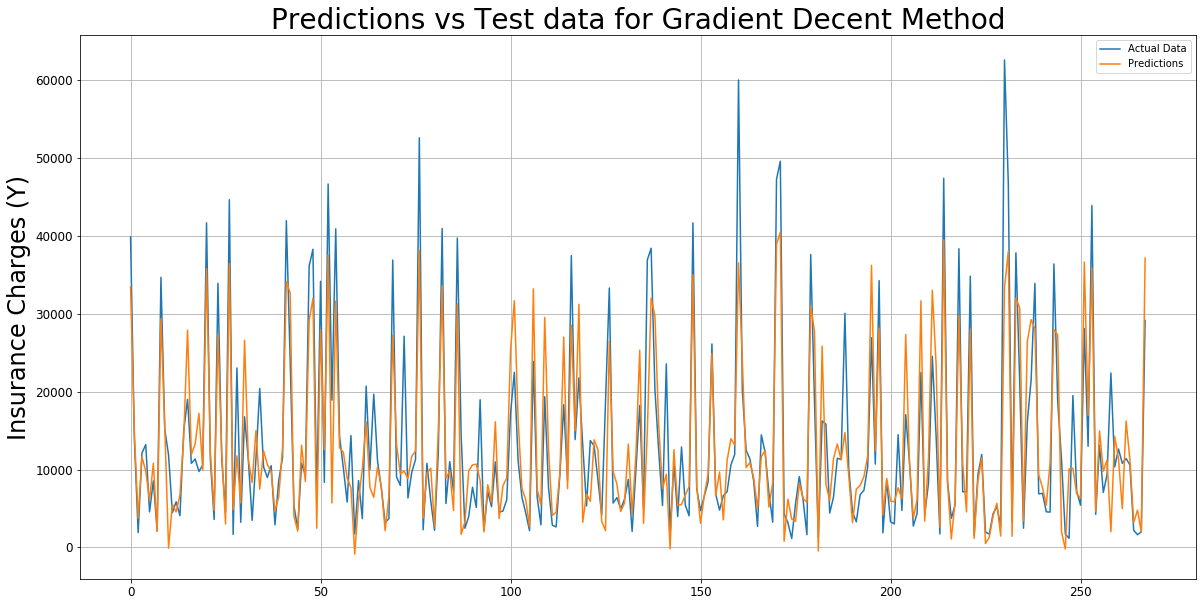

In [16]:
##Plotting the predictions vs the actual data.
plt.figure(figsize=(20,10))
plt.plot(Ytest, label='Actual Data')
plt.plot(yhat, label='Predictions')
plt.grid()
plt.ylabel('Insurance Charges (Y)', fontsize=24)
plt.title('Predictions vs Test data for Gradient Decent Method', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

# STOCHASTIC GRADIENT DESCENT METHOD

### Step 1 : Finding w using Stochastic Gradient Descent Method using only the TRAINING DATA

In [32]:
## Updating the w using the stochastic gradient descent method
made_w = np.matrix([10,20,30,40], dtype=float).transpose()

for i in range(0,500000,1):
    #print(i)
    rx = np.random.randint(1070)
    picked_x = np.matrix(Xtrain[rx], dtype = float)
    picked_y = np.matrix(Ytrain[rx], dtype = float)

    #calculating the first term: -2*xiT*yi
    first = np.dot(picked_x.transpose(),picked_y)
    first = first * -2

    #calculating the second term: 2*xiT*xi*w
    second = np.dot(picked_x.transpose(),picked_x)
    second_1 = np.dot(second, made_w)
    second_2 = second_1 * 2

    #calculating gradient
    grad = first + second_2

    a = 0.00001
    sgd = a * grad
    made_w = made_w - sgd

    
    #if(grad.all() <= 0.00001):
    #    break
    
print("The w calculated using the Stochastic Gradient Descent method is: \n"+ str(made_w))

# w from OLS Estimate: [[-11853.16958248    261.77032429    323.81304386  23619.60977643]]

The w calculated using the Stochastic Gradient Descent method is: 
[[-2501.70898295]
 [  211.01249428]
 [  128.82141986]
 [18570.18391879]]


### Step 2: Find y hat using only TESTING DATA [ŷi = wt * X]

In [33]:
y_hat = np.dot(Xtest, made_w)

print("The Predicted values of Y for each X value from the test dataset is: \n" + str(y_hat))

The Predicted values of Y for each X value from the test dataset is: 
[[28651.34725859]
 [14842.86770449]
 [ 5955.86687476]
 [12613.32831399]
 [12520.98140728]
 [ 8062.51664782]
 [11538.16368396]
 [ 5282.77495599]
 [26057.88735698]
 [15128.20714948]
 [ 4102.24643873]
 [ 7836.43505597]
 [ 8086.75312608]
 [ 8308.56555976]
 [14509.47486134]
 [26655.39419639]
 [12836.57884316]
 [13589.03077367]
 [14620.87530398]
 [12161.94407591]
 [30648.10935197]
 [12946.72115714]
 [ 6564.03881502]
 [24626.92097385]
 [12390.19758057]
 [ 5335.06742679]
 [31333.70898268]
 [ 6490.86523999]
 [12448.30205804]
 [ 7152.24343521]
 [25491.73225947]
 [12366.24582214]
 [ 8633.95944066]
 [14384.89251412]
 [ 9144.63161742]
 [12917.34686486]
 [11692.88422632]
 [11426.61336002]
 [ 6849.25846426]
 [ 9615.36915402]
 [13053.89756991]
 [29032.40402709]
 [29527.1083649 ]
 [ 6796.57652064]
 [ 5508.99138637]
 [13312.57398954]
 [ 9968.07016738]
 [25637.4052169 ]
 [27637.25300724]
 [ 6398.6531718 ]
 [24966.754888  ]
 [12121.9793

### Step 3: Find the RMSE using TESTING DATA  

sqrt((sum(i,N)(yi - predicted_y)^2)/N)

In [34]:
sgd_rmse = find_rmse(Ytest, y_hat)
#range: 6000 - 7000
print(sgd_rmse)

6716.00334943699


### Step 4: Plot comparing the actual & predictions

   Compare yhat and Ytest 

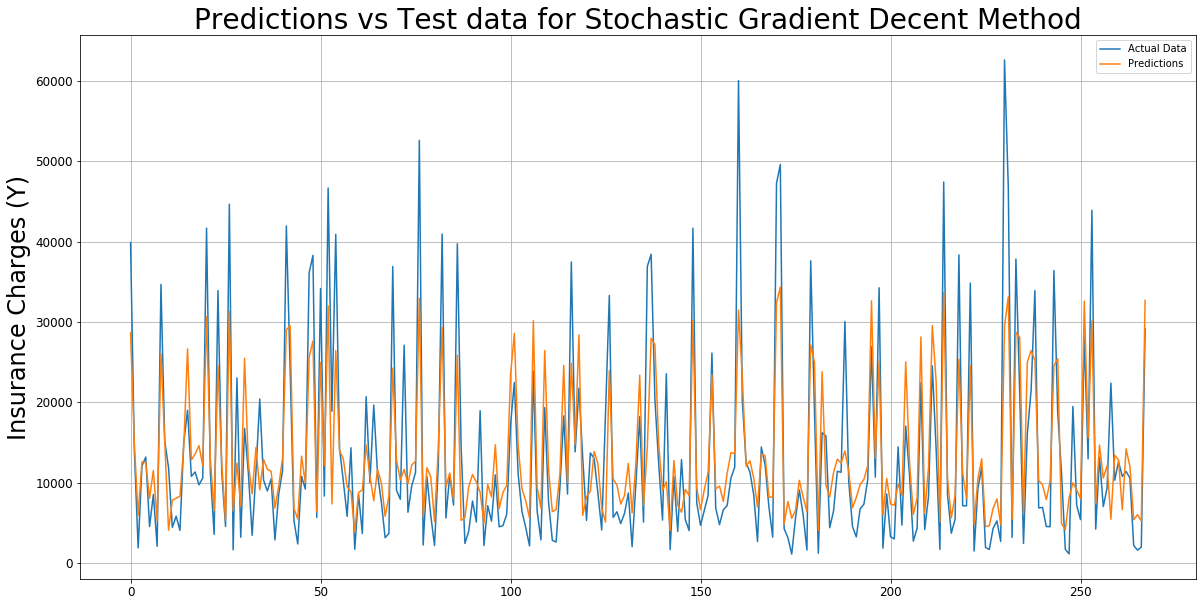

In [35]:
##Plotting the predictions vs the actual data.
plt.figure(figsize=(20,10))
plt.plot(Ytest, label='Actual Data')
plt.plot(y_hat, label='Predictions')
plt.grid()
plt.ylabel('Insurance Charges (Y)', fontsize=24)
plt.title('Predictions vs Test data for Stochastic Gradient Decent Method', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

# BONUS! - RIDGE REGRESSION

### Step 1: Find w using direct minimization using only the TRAINING DATA

In [21]:
##Calculating w for ridge regression using w=XtX + lamba*identity(d+1)^-1 + Xty

##calculating XtX
first_r = np.dot(Xtrain.transpose(), Xtrain)

##d+1 = 4 for the identity matrix
identity_matrix = np.identity(4)

##finding the second term within the inverse (lambda*identity(d+1))
lamb = 0.0001
identity_matrix = lamb * identity_matrix

#inverse
first_r = first_r + identity_matrix
ridge_inv = np.linalg.inv(first_r)

##Putting them together
ridge_w = np.dot(ridge_inv, Xtrain.transpose())
ridge_w = np.dot(ridge_w, Ytrain)
print(ridge_w)

# w from OLS Estimate: [[-11853.16958248    261.77032429    323.81304386  23619.60977643]]

[[-11853.13117174]
 [   261.77014415]
 [   323.81216337]
 [ 23619.59447725]]


### Step 2: Finding y_hat using TESTING DATA

In [22]:
ridge_yhat = np.dot(Xtest, ridge_w)

print("The Predicted values of Y for each X value from the test dataset is: \n" + str(ridge_yhat))

The Predicted values of Y for each X value from the test dataset is: 
[[33455.67553541]
 [14820.66138719]
 [ 3764.79102169]
 [11634.15189076]
 [ 9790.17349292]
 [ 6105.11535537]
 [10812.0548314 ]
 [ 2072.87246807]
 [29354.39667745]
 [15537.90532906]
 [  -88.63965872]
 [ 5536.82500865]
 [ 4554.18696538]
 [ 6723.59658741]
 [14251.26968783]
 [27901.26151722]
 [11926.68419043]
 [13280.80267779]
 [17217.70900365]
 [ 9962.2457114 ]
 [35788.42227318]
 [12203.54359012]
 [ 4756.23988608]
 [27369.29624341]
 [12147.8459416 ]
 [ 3010.24274475]
 [36437.21388885]
 [ 4840.94875673]
 [11756.61686838]
 [ 5697.49786513]
 [26588.07132218]
 [11281.71434086]
 [ 8347.44865044]
 [15012.68004365]
 [ 7481.96663045]
 [12398.34859632]
 [10663.68488071]
 [ 9725.73095957]
 [ 4667.25747743]
 [ 6516.10283981]
 [12741.58948949]
 [34144.87773522]
 [32701.97464807]
 [ 3997.54994371]
 [ 2104.21826806]
 [13123.17013409]
 [ 8477.23726092]
 [29103.37631456]
 [31981.16290315]
 [ 2460.02581215]
 [27954.87855094]
 [12548.2057

### Step 3: Find the RMSE using TESTING DATA  

sqrt((sum(i,N)(yi - predicted_y)^2)/N)

In [23]:
ridge_rmse = find_rmse(Ytest, ridge_yhat)
#range: 6000 - 7000
print(ridge_rmse)

6123.817824591304


### Step 4: Plot comparing the actual & predictions

 Compare yhat and Ytest 

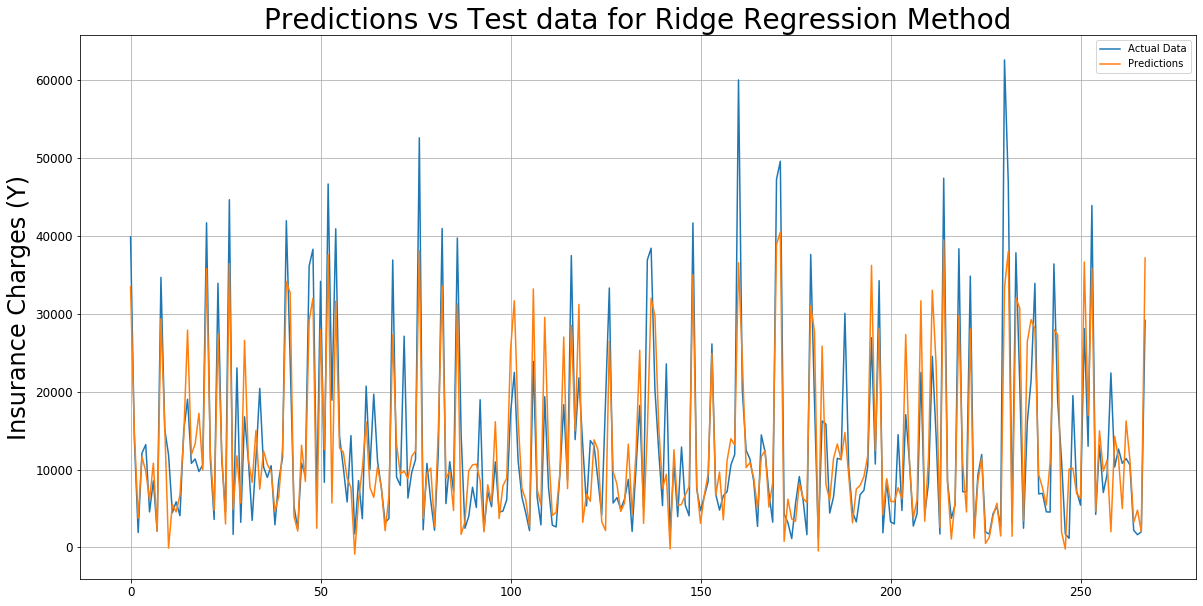

In [24]:
##Plotting the predictions vs the actual data.
plt.figure(figsize=(20,10))
plt.plot(Ytest, label='Actual Data')
plt.plot(ridge_yhat, label='Predictions')
plt.grid()
plt.ylabel('Insurance Charges (Y)', fontsize=24)
plt.title('Predictions vs Test data for Ridge Regression Method', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()